<a href="https://colab.research.google.com/github/aka-gera/Regression/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFIER**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

This dataset is provided by: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [82]:
data_dir = f'hellbuoy/car-price-prediction'

# Import Dataset

In [83]:
! pip install shap
import shap


In [84]:
! pip install kaggle

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
!pwd
%cd /content

/content/drive/My Drive/ML2023/data-analysis
/content


In [87]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [88]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle

In [89]:
! chmod 600 ~/.kaggle/kaggle.json

In [90]:
! kaggle datasets download {data_dir}

Dataset URL: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
License(s): unknown
car-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [91]:
import os
file_names = os.listdir()
zip_file =   [file for file in file_names if file.endswith('.zip')]
zip_file

['car-price-prediction.zip']

In [92]:
import zipfile

# Open the zip file
with zipfile.ZipFile(zip_file[-1], 'r') as zip_ref:
    zip_ref.extractall()
    unzipped_file_names = zip_ref.namelist()
unzipped_file_names

['CarPrice_Assignment.csv', 'Data Dictionary - carprices.xlsx']

# Import the helper classes

In [93]:
!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis

/content
/content/drive/MyDrive/ML2023/data-analysis


In [94]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
from plotly.subplots import make_subplots

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter
from aka_data_analysis.aka_regression import aka_regression_analysis

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [95]:
from aka_data_analysis.aka_nn import aka_nn

In [96]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information

In [97]:
df = aka_clean.df_get(f'/content/{unzipped_file_names[0]}')

In [98]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [100]:
fig = aka_plot.Plot_histogram_Features(df,[0,1,2,-2,-1] )
if fig is not None:
    fig.show()

In [101]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Clean Dataset

## Drop Duplicate data

In [102]:
df.drop_duplicates()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Swap the target and the last feature

In [103]:
df = aka_clean.swap_features(df,-1)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Drop feature(s)


In [104]:
feat =  [0,8]
df = aka_clean.drop_feature(df,feat)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##  Convert categorical variables into numerical representations

In [105]:
mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,0,0,0,1,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,0,0,1,2,1,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,0,0,1,2,2,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


## Balance Dataset

In [106]:
# aka_plot.plot_pie(df,-1)

In [107]:
# df = aka_clean.balance_df(df,'j')
# aka_plot.plot_pie(df, -1)

## Correlation Matrix

In [108]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [109]:

confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .5      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

print(f'We dropped {df.shape[0]-df_filtered.shape[0]} outliers and remove {df.shape[1]-df_filtered.shape[1]} feature(s)')
print(f'The filtered dataset\'s shape is {df_filtered.shape} ')

We dropped 40 outliers and remove 15 feature(s)
The filtered dataset's shape is (165, 9) 


## Graph the features that are highly correlated


In [110]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp))
if fig is not None:
    fig.show()

### Visualize the distribution of the filtered dataset

In [111]:
aka_plot.Plot_box_Features(df,df_filtered,corr_tmp=range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [112]:
pre_proc = 'X'                                # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

## Linear Regression

In [113]:

from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score


clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("R-squared score (Linear Regression):", r2_score(y_test, y_pred))

R-squared score (Linear Regression): 0.041148497739176726


In [114]:
params = np.append(clf.intercept_,clf.coef_)
print(params)
y_pred = clf.predict(X_train)
feat_name = df_filtered.columns[:-1]

aka_regression_analysis().plot_regression_summary(X_train, y_train, y_pred, params, feat_name)

[11674.41602437    52.71289101  1408.8024795    154.14049243
   486.32286454  -360.40667557  -684.29374684   -20.07357957
  1140.86048319]
[521.14759528 589.69668589 744.70809463 616.88911457 631.86960867
 589.09067157 626.09043773 812.81127361 585.46300495]


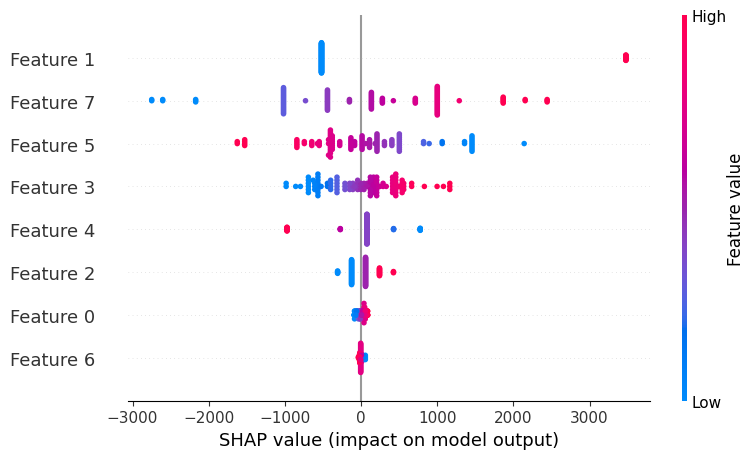

In [115]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

## Xgboost Regression

In [116]:
import xgboost as xgb  # Importing xgboost library as xgb

clf = xgb.XGBRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("R-squared score (XGBoost classifier):", r2_score(y_test, y_pred))


R-squared score (XGBoost classifier): 0.8188860011828755


In [117]:
params = [0]
for item in clf.feature_importances_:
  params.append(item)
print(params)
y_pred = clf.predict(X_train)
feat_name = df_filtered.columns[:-1]

aka_regression_analysis().plot_regression_summary(X_train, y_train, y_pred, params, feat_name, 1)

[0, 0.047636542, 0.037722856, 0.13075691, 0.13187389, 0.31456393, 0.039262965, 0.27280596, 0.025376903]
[30.7374077  34.78044919 43.92305852 36.38426502 37.26781809 34.74470632
 36.92696123 47.93980003 34.53074569]


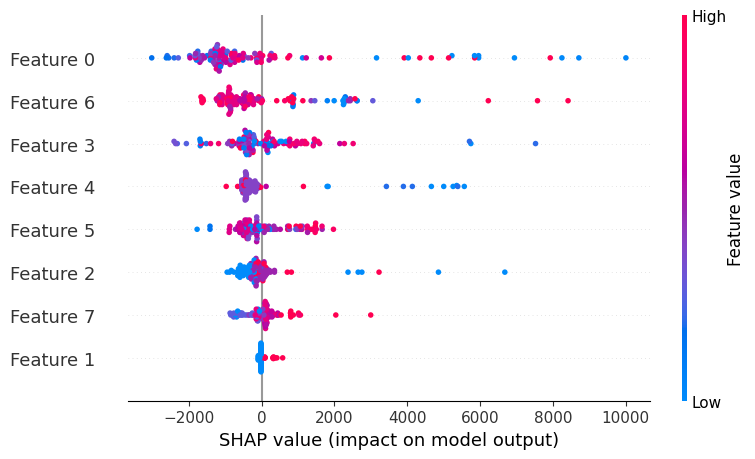

In [118]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# Statsmodels Regression

In [119]:

from statsmodels.regression import linear_model
from statsmodels.api import add_constant

# Add a constant to the independent variable matrix
X_train_with_const = add_constant(X_train)

# Fit the OLS model
model = linear_model.OLS(y_train, X_train_with_const)
results = model.fit()

# Print the summary of the regression results
print("Summary:")
print(results.summary())


Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     1.787
Date:                Fri, 10 May 2024   Prob (F-statistic):             0.0877
Time:                        04:07:43   Log-Likelihood:                -1149.8
No. Observations:                 115   AIC:                             2318.
Df Residuals:                     106   BIC:                             2342.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.167e+04    521.148     22.401

# Neural Net

## Neural Network Parameters

In [120]:
activation = 'relu'
epoch = 10
num_nodes = [2,4]
dropout_prob = [0.05,0.1]
lr = [0.01,0.1]
batch_size = [2,4]

In [121]:

myNN = aka_nn(X_train, X_test, y_train, y_test,activation)
model,scre =myNN.DNN(epoch,num_nodes,dropout_prob,lr,batch_size)


2 nodes, dropout 0.05, lr 0.01, batch size 2
2/2 [==============================] - 0s 13ms/step - loss: 187875136.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.01, batch size 4
2/2 [==============================] - 0s 18ms/step - loss: 182319424.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.1, batch size 2
2/2 [==============================] - 0s 8ms/step - loss: 46418096.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.1, batch size 4
2/2 [==============================] - 0s 9ms/step - loss: 52219788.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.01, batch size 2
2/2 [==============================] - 0s 9ms/step - loss: 170567088.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.01, batch size 4
2/2 [==============================] - 0s 8ms/step - loss: 184802176.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.1, batch size 2
2/2 [==============================] - 0s 8ms/step - loss: 48410628.0000 - accuracy: 0.0000e+00
2 nodes, drop

In [122]:
y_pred = model.predict(X_test)
print("R-squared score (DNN):", r2_score(y_test, y_pred))

2/2 [==============================] - 0s 6ms/step
R-squared score (DNN): 0.07943783809082128


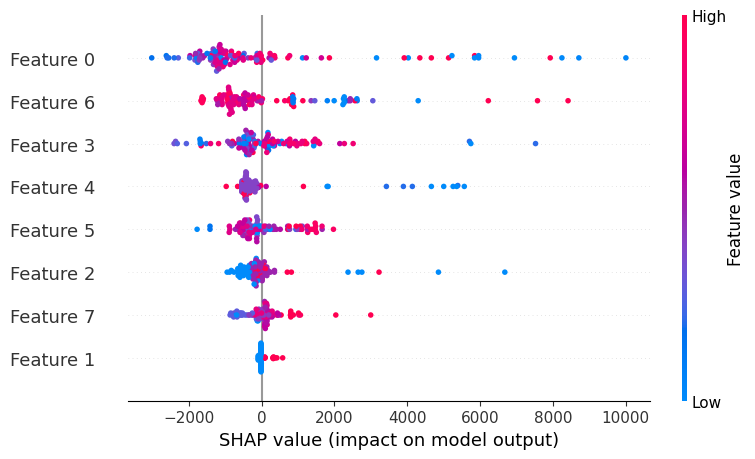

In [123]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)